## TSA_Claims



---


Team Members: Divyansh Singh and Prerana Kharat

# Data Introduction 

We will examine the dataset of thousands of claims filed against TSA (Terminal Security Agency) all over the United States. These claims are generally filed against TSA for personal property damages. Property can be lost, damaged or stolen during screenings. 

These claims were filed between 2002 and 2015. TSA keeps a track of every claim. Our dataset from Kaggle, features columns such as Incident Date,Airport Name,Type of Item, if the claim amount requested was too high and the status of the claim. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier,plot_tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir= "/content/drive/MyDrive/tsa_claims.csv"
df= pd.read_csv(data_dir,low_memory=False)

# **Initial Exploration**

df.head() helps us to view the first 5 rows of the dataset.

In [ ]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


Our original dataset comprises of 204267 rows and 13 columns. Panda's info() and decsribe() commands are also used to get more detailed information about the raw dataset.

In [ ]:
df.shape

(204267, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [ ]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204244,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013123010324,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


We will have a look at the count number of distict features in the dataframe

In [ ]:
df.nunique()

Claim Number     204244
Date Received      4007
Incident Date     26807
Airport Code        465
Airport Name        485
Airline Name        318
Claim Type           11
Claim Site            6
Item               4704
Claim Amount      36117
Status               15
Close Amount      17162
Disposition           3
dtype: int64

Top 10 airports with TSA Claims?

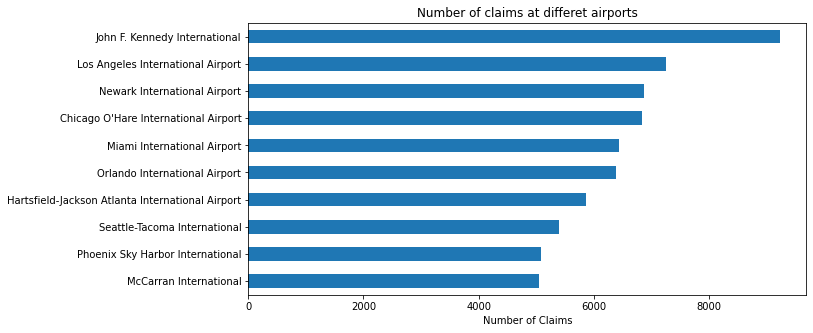

In [ ]:
plt.figure(figsize=(10,5))
df['Airport Name'].value_counts().head(10).sort_values().plot.barh()
plt.title("Number of claims at differet airports")
plt.xlabel("Number of Claims");

As per the plot bar, we can see that John F. Kennedy International airport has the highest number of TSA claims filed by the customers, followed by Los Angeles International Airport and Newark International Airport 

Are the claims being accepted or denied?

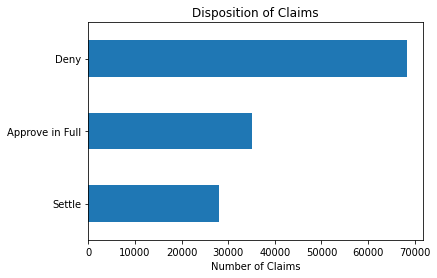

In [ ]:
df['Disposition'].value_counts().sort_values().plot.barh()
plt.title("Disposition of Claims")
plt.xlabel("Number of Claims");

More than 60,000 claims filed against TSA have been denied. The type of claims include property being lost, stolen or damaged. TSA has few cases where the claim is either approved in full amount or is settled.

What was the type of these claims?

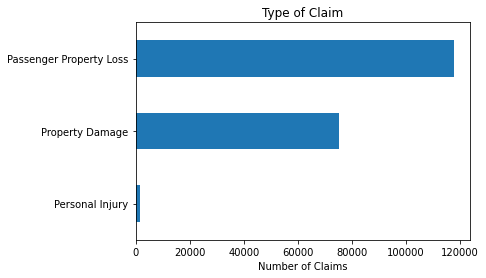

In [ ]:
df['Claim Type'].value_counts().head(3).sort_values().plot.barh()
plt.title("Type of Claim")
plt.xlabel("Number of Claims");

This horizontal bar plot tells us that most of the passengers have lost their property rather than damaged it. We will later find out what type of items are involved in these claims.

# Data Preprocessing and Cleaning


To make use of the 'Claim Amount' columns we first need to Convert it's object data to float data

In [ ]:
df['Claim Amount']

0         $350.00 
1         $100.00 
2         $278.88 
3          $50.00 
4          $84.79 
            ...   
204262           -
204263           -
204264           -
204265           -
204266           -
Name: Claim Amount, Length: 204267, dtype: object

In [ ]:
df['Claim Amount']=df['Claim Amount'].str.replace(';','')
df['Claim Amount']=df['Claim Amount'].str.replace('-','')

The amount column contains signs such as ";", "-", "$", which we need to get rid of to convert the data to numeric

In [ ]:
df['Claim Amount New'] = df['Claim Amount'].str.replace('$', '')
df['Claim Amount New'] = pd.to_numeric(df['Claim Amount New'])
df['Claim Amount New'].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0     350.00
1     100.00
2     278.88
3      50.00
4      84.79
5     459.01
6     106.52
7      75.00
8    2270.09
9    4457.29
Name: Claim Amount New, dtype: float64

We created a new column 'Claim Amount New' which is now numeric and will be used for preprocessing.

In [ ]:
df['Close Amount']=df['Close Amount'].str.replace(';','')

Similarly, we follow the same steps required to make a new numeric column 'Close Amount New' which is of float64 type

In [ ]:
df['Close Amount New'] = df['Close Amount'].str.replace('$', '')
df['Close Amount New'] = pd.to_numeric(df['Close Amount New'])
df['Close Amount New']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0         350.00
1          50.00
2         227.92
3          50.00
4          84.79
           ...  
204262       NaN
204263       NaN
204264       NaN
204265       NaN
204266       NaN
Name: Close Amount New, Length: 204267, dtype: float64

Date Received is the date on which the claim was recieved by TSA. Using pandas function "to_datetime", we create two new columns- 'Year Received' and 'Month Received' by extracting the year and month respectively

In [ ]:
df['Year Received'] = pd.to_datetime(df['Date Received']).dt.year
df['Month Received'] = pd.to_datetime(df['Date Received']).dt.month

We will have a look at the number of times the unique values have occured in the 'Item' column

In [ ]:
df['Item'].value_counts().head(10)

Other                                         36908
Luggage (all types including footlockers)     19128
Clothing - Shoes; belts; accessories; etc.    14937
Jewelry - Fine                                 9902
Locks                                          9570
Cameras - Digital                              9171
Computer - Laptop                              8578
Baggage/Cases/Purses                           6352
Computer & Accessories                         5149
Clothing                                       4710
Name: Item, dtype: int64

To optimize the 'item' column by categorising it into 6 main categories - Personal Items, Electronic Items, Jewelry, Luggage, Locks, and Miscellaneous Items. We create a function 'func' for this action

In [ ]:
def func(val):
    if(val=="Clothing - Shoes; belts; accessories; etc."):
        return "Personal Items"
    elif(val=="Jewelry & Watches"):
        return "Jewelry"
    elif(val=="Clothing"):
        return "Personal Items"
    elif(val=="Jewelry - Fine"):
        return "Jewelry"
    elif(val=="Cameras - Digital"):
        return "Electronic Items"
    elif(val=="Computer - Laptop"):
        return "Electronic Items"
    elif (val=="Computer & Accessories"):
        return "Electronic Items"
    elif (val== "Personal Electronics"):
        return "Electronic Items"
    elif(val=="Cell Phones"):
        return "Electronic Items"
    elif(val=="Luggage (all types including footlockers)"):
        return "Luggage"
    elif (val=="Baggage/Cases/Purses"):
        return "Luggage"
    elif (val=="Cameras"):
        return "Electronic Items"
    elif (val=="MP3 Players-(iPods; etc)"):
        return "Electronic Items"
    elif (val=="Locks"):
        return "Locks"
    elif (val=="DVD/CD Players"):
        return "Electronic Items"
    else:
        return "Miscellaneous Items"

In [ ]:
df['Item Category']= df['Item'].apply(func)

We can now see out new column 'Item Category' with our desired categories.

In [ ]:
df['Item Category'].value_counts()

Miscellaneous Items    103576
Electronic Items        31953
Luggage                 25480
Personal Items          19647
Jewelry                 14041
Locks                    9570
Name: Item Category, dtype: int64

We make a new column called 'Claim Percentage' by dividing close amount by claim amount and calculating its percentage.

In [ ]:
df['Claim Percentage'] = (df['Close Amount New']/df['Claim Amount New'])*100

It can be seen that our dataset consists a lot of missing values 

In [ ]:
df.isna().sum()

Claim Number            0
Date Received         263
Incident Date        2183
Airport Code         8524
Airport Name         8524
Airline Name        34374
Claim Type           7913
Claim Site            740
Item                 3966
Claim Amount         4043
Status                  5
Close Amount        68952
Disposition         72908
Claim Amount New    16795
Close Amount New    68952
Year Received         263
Month Received        263
Item Category           0
Claim Percentage    70359
dtype: int64

We can see that there are no empty string within our columns except for Claim Amount

In [ ]:
(df.select_dtypes(include='object') == "").sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item                 0
Claim Amount     12752
Status               0
Close Amount         0
Disposition          0
Item Category        0
dtype: int64

We find the fraction of NA values in our Dataset before cleaning

In [ ]:
round(df.isna().mean().mean(),3)

0.095

'Close Amount New' had the largest number of NA values, so we decide to remove the same. Further, we remove the remaining NA values from 'Claim Amount New' and 'Claim Percentage', as we derive our target variable from the same.

In [ ]:
df.dropna(subset=['Close Amount New','Claim Amount New','Claim Percentage'],inplace=True)

We remove the NA values from the folowing columns as they consist of relatively less amount of NA values.

In [ ]:
df.dropna(subset=['Claim Site','Status','Date Received','Incident Date','Airport Code'],inplace=True)

We also get rid of the columns like 'Close Amount','Claim Amount', 'Item' as we have derived new columns from them and will not be using them in the future. 

In [ ]:
df = df.drop(['Close Amount','Claim Amount','Item'],axis=1)

We will also remove 'Claim Number' as we will not be using them in the future. 

In [ ]:
df = df.drop(['Claim Number'],axis=1)

We fill the missing values values of 'Airline Name' and 'Disposition' column with the strings "MISSING" and "DENY" respectively,because there’re too many NA values which cannot be dropped,hence we imputed them so that we might not lose important rows.

In [ ]:
df['Airline Name'].replace(np.nan,"MISSING",inplace=True)
df['Disposition'].replace(np.nan,'Deny',inplace=True)

Mode is the value which occurs most frequently. 'Claim Type' is a categorical column and so we compute the mode of the values of 'Claim Type' and fill the missing values with it's mode

In [ ]:
mode = df['Claim Type'].value_counts().index[0]

In [ ]:
df['Claim Type'].fillna(mode,inplace=True)

In [ ]:
df.isna().mean().mean()

0.0

We can now see that our dataset is free of null values.

We will now handle the bad data and outliers found in our dataset.

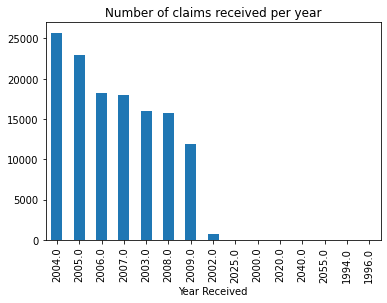

In [ ]:
df['Year Received'].value_counts().plot.bar()
plt.title("Number of claims received per year")
plt.xlabel("Year Received");

It is strange to see that the 'Year Received' column has 2055 as a year value which has to be removed.
So using condition we remove all the years greater than 2020.

In [ ]:
indexNames = df[df['Year Received'] > 2020.0 ].index
df.drop(indexNames , inplace=True)

Next, we have a look at the 'Claim Percentage' column for bad data

In [ ]:
(df['Claim Percentage']>100).sum()

386

How can percentage be more than 100?  We drop the values which are more than 100 in the 'Claim Percentage' column

In [ ]:
indexNames1 = df[df['Claim Percentage'] > 100 ].index
df.drop(indexNames1 , inplace=True)

We can see that almost half of the data is 0 that means only half of the people that claimed for an item at TSA got their money back

In [ ]:
round((df['Claim Percentage']>0).mean(),3)

0.465

Converting all the values in Claim Percentage to categorical values, where it returns 1 if the passenger gets any money back from TSA, and returns 0, if the passenger does not get any money back.

In [ ]:
df['Get Anything']=(df['Claim Percentage']>0).astype(int)

'Incident Date' has a strange date with the wrong format. We remove it using the drop function

In [ ]:
indexNames3 = df[df['Incident Date'] == "10-OCT-0200 00:00"].index
df.drop(indexNames3 , inplace=True)

Here, we are extracting the Month and Year of the Incident from the 'Incident Date' and 'Incident Year' respectively using the pandas to_datetime function. errors="coerce" sets the values as NaN if the parsing is invalid. 
 We assign these to our new columns- 'Incident Month' and 'Incident Year'

In [ ]:
df['Incident Month'] = pd.to_datetime(df['Incident Date'],format = "%m/%d/%Y %H:%M",errors="coerce").dt.month
df['Incident Year'] = pd.to_datetime(df['Incident Date'],format = "%m/%d/%Y %H:%M",errors="coerce").dt.year

We notice that there are same number of null values in Incident Month and Incident Year

In [ ]:
df['Incident Month'].isna().sum()

148

In [ ]:
df['Incident Year'].isna().sum()

148

We check and remove the NA values from our new columns created.

In [ ]:
df.dropna(subset=['Incident Month', 'Incident Year'], inplace= True)

We also will change the type of 'Year Recieved', 'Incident Month' and 'Incident Year' to int to get rid of the decimals.

In [ ]:
df['Incident Month']= df['Incident Month'].astype(int)
df['Incident Year']= df['Incident Year'].astype(int)
df['Year Received']= df['Year Received'].astype(int)

We can notice that the 'Incident Year' and 'Year Received' columns have outliers. The values have a huge difference with almost negligible values in certain rows.

Therefore, we drop these invalid years by conditioning

In [ ]:
incyear = df[ (df['Incident Year'] >= 1996) & (df['Incident Year'] <= 2001) ].index
df.drop(incyear , inplace=True)

In [ ]:
incyear1= df[df['Incident Year']== 2010].index
df.drop(incyear1,inplace= True)

In [ ]:
incyear2 = df[(df['Year Received'] >= 1994) & (df['Year Received'] <= 2000) ].index
df.drop(incyear2 , inplace=True)

In [ ]:
incyear3= df[df['Year Received']== 2020].index
df.drop(incyear3,inplace= True)

# Data Visualization

Are the items mostly lost or damaged?

In [ ]:
ClaimTypeDf = df[df['Claim Type'].isin(['Passenger Property Loss','Property Damage',])]

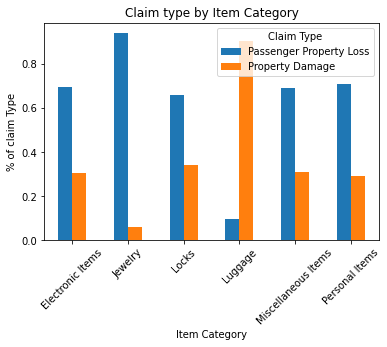

In [ ]:
pd.crosstab(ClaimTypeDf['Item Category'],ClaimTypeDf['Claim Type'],normalize="index").plot.bar(rot=45)
plt.title("Claim type by Item Category")
plt.ylabel("% of claim Type");

The above crosstab shows us a fact that most of the valuable jewellery items have been lost, whereas the luggage is mostly damaged.

On the other hand, all the other item categories have a constant claim type.

Where are most of the items lost or damaged?

In [ ]:
wthr= df[(df['Item Category'].isin(["Electronic Items","Jewelry","Locks"])) & (df['Claim Site'].isin(["Checked Baggage","Checkpoint"]))]

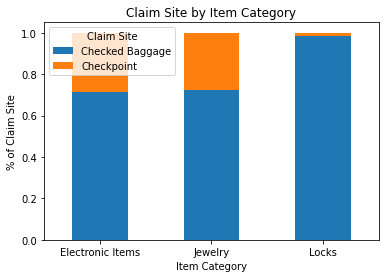

In [ ]:
pd.crosstab(wthr['Item Category'],wthr['Claim Site'],normalize='index').plot.bar(rot=0, stacked = True)
plt.title("Claim Site by Item Category")
plt.ylabel("% of Claim Site");


From the above plot, we conclude that most of the item categories like Electronic Items, Jewellery and Locks have been lost or damaged at the Checked Baggage and a few number of locks have been lost or damaged at the Checkpoint.

In which year most of the incidents occured?

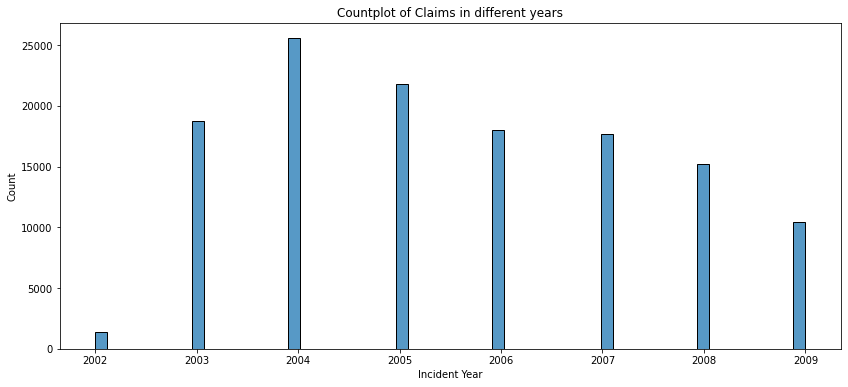

In [ ]:
plt.figure(figsize=(14,6))
yearR= df[(df['Incident Year'].isin([2000.0, 2001.0, 2002.0, 2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0]))]
sns.histplot(yearR['Incident Year'])
plt.title("Countplot of Claims in different years");

From the above histogram, it is seen that most of the incidents have occurred in 2004, which have decreased in the years after.

What has the TSA concluded to the claims of different items?

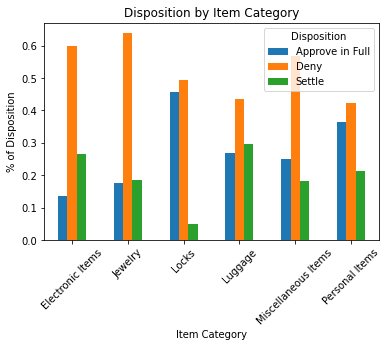

In [ ]:
pd.crosstab(df['Item Category'], df['Disposition'], normalize='index').plot.bar(rot=45)
plt.title("Disposition by Item Category")
plt.ylabel("% of Disposition");

We can say that the TSA has denied the claims of most of the passengers and a few have been approved in full amount.
The approval to denial ratio of locks is almost the same, whereas, electronic items do not seem to be approved in full amount.

<!-- Over the years what are the trends in claims on different item categories? -->

In [ ]:
# light1df = df[df['Incident Year'].isin(['2003','2004','2005','2006','2007','2008','2009'])]
# pd.crosstab(light1df['Incident Year'],light1df['Item Category'],normalize="index").plot.bar(stacked=True)
# plt.title("Item Category by Incident Year")
# plt.ylabel("% of item categories");

<!-- The above stacked bar plot tells us that over the years the item category - luggage has been decreasing. 
We can also see trends in the miscellaneous and jewellery items. Claims on jewellery items have been decreased after 2005 and claims on miscellaneous items have increased drastically. -->


over the years did people get ateast some amount of their money back from the TSA?

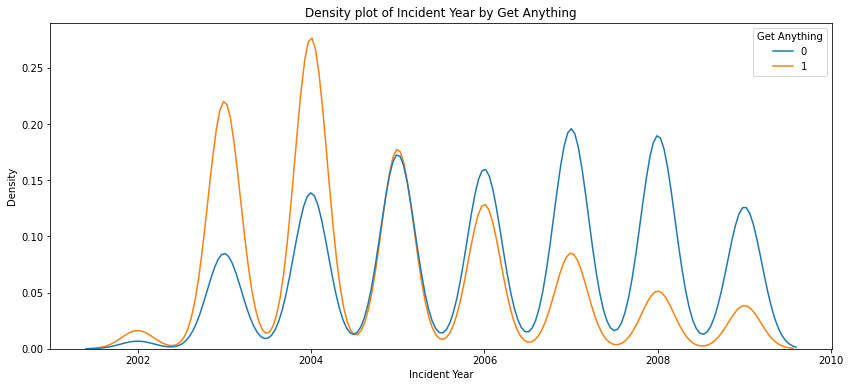

In [ ]:
plt.figure(figsize=(14,6))
sns.kdeplot(df['Incident Year'],hue= 'Get Anything', data=df)
plt.title("Density plot of Incident Year by Get Anything");

This double density plot tells us that in the year 2004 and 2005, many passengers got back atleast some amount of money from TSA, whereas we can see that after 2005, the chances of people getting their money back started decreasing and the chances of people getting 0 money back started increasing.

# Machine Learning
We are going to predict whether passengers receive any money or not when they file claims against TSA for property loss or damage. 

As this is a classification problem, we will be using the following Machine Learning Algorithms -
Naive Bayes and Decision Trees Classifier.

## Naive Bayes

The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed.

First we set our predictors and target. 

Predictors are the features used to predict some other variable or outcome and the target variable is the variable which we want to predict which also is our outcome.

In [ ]:
predictors1= df[['Airport Code','Airline Name','Claim Type','Claim Site','Year Received','Month Received','Item Category','Incident Month','Incident Year']]
target1= df['Get Anything']

Here our target is the 'Get Anything' column which we are going to predict with the help of predictor variable- 'Airport Code','Airline Name','Claim Type','Claim Site','Year Received','Month Received', 'Item Category','Incident Month','Incident Year'.

We will check if our target variable is balanced or not

In [ ]:
df['Get Anything'].value_counts()

0    68825
1    59913
Name: Get Anything, dtype: int64

As the number of 0s and 1s is more or less the same,i.e. we can consider this as balanced.
0 has occurred the most number of times i.e most of the people have not got anything from TSA and hence 0 is our mode

We prepare our data by converting our categorical predictors to numeric predictors

In [ ]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data

# define ordinal encoding
encoder = OrdinalEncoder()
X= encoder.fit_transform(predictors1)
print(X)

[[129.  72.   5. ...   4.  11.   0.]
 [364. 120.   5. ...   3.   0.   2.]
 [387.  42.   5. ...   0.  10.   1.]
 ...
 [380. 163.   2. ...   2.  11.   7.]
 [123. 192.   2. ...   2.  11.   7.]
 [215.  42.   5. ...   0.  10.   7.]]


Using the ordinal encoder we have transformed our categories into numbers

In [ ]:
y = df['Get Anything'].values

y is the target value and using .values we convert it into a numpy array

We will now split our dataset into training data and test data. 

30% of the data will be used in testing while 70% of the data will be used in training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

We compute our baseline accuracy first. Baseline Accuracy in a classification problem tells us about how our model will perform in terms of accuracy just by guessing the majority class.


In [ ]:
baseline_accuracy = (y_train==0).mean()
print('Baseline accuracy: {:.3f}'.format(baseline_accuracy))

Baseline accuracy: 0.535


Our baseline accuracy comes out to be 53.5%.

We import the categorical naive bayes model from sklearn

In [ ]:
from sklearn.naive_bayes import CategoricalNB

We make the object of our model and assign in to the variable "model"

In [ ]:
model = CategoricalNB()

We fit our trainig data into our model by using the .fit method.

In [ ]:
clf = model.fit(X_train, y_train)

We predict the values of the test data by using the .predict method and assign it to the variable "y_pred"

In [ ]:
y_pred = model.predict(X_test)

We import the accuracy score metrics from sklearn metrics

**Test Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.6792242763191964

We can see that our model gives us an accuracy of 67.9% which is close to 68%.

We will also predict the values of the train data by using the .predict method and assign it to the variable "y_pred_train"

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.6819765635403258

So our training accuracy comes out to be 68%

We will create a confusion matrix of our 'y_test' and 'y_pred' to look at the positives and negatives.

True positives and the false negatives are on the left diagonals and the false positives and true negatives are on the right diagonal

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[14486,  6168],
       [ 6221, 11747]])

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     20654
           1       0.66      0.65      0.65     17968

    accuracy                           0.68     38622
   macro avg       0.68      0.68      0.68     38622
weighted avg       0.68      0.68      0.68     38622



We will also have a look on the classification report. The report tells us about the presicion, recall and f1 score along with overall accuracy that our model can support. We dont focus on the f1 score as we have a balanced data set and hence accuracy is used.


We build our categorical naive bayes model to predict whether passengers receive any money or not when they file claims against TSA for property loss or damage.

 The model predicts a decent accuracy of about 68%, if we compare training and test accuracy, they are quite close, and hence there are very low chances of overfitting.

##Decision Tree Classifier


The general motive of using Decision Tree is to create a training model which can use to predict class or value of target variables by learning decision rules inferred from prior data(training data). 

The first step is to convert our categorical predictors to numerical. 

'Claim Site', 'Item Category', 'Claim Type' are nominal variables and will be encoded using dummies

In [ ]:
df = pd.get_dummies(df, columns=['Claim Site', 'Item Category', 'Claim Type'], drop_first=True)

We set our predictors and target.
We have used our dummy features as our pedictors and our target remains the same i.e. 'Get Anything'



In [ ]:
predictors= ['Claim Site_Checkpoint','Claim Site_Motor Vehicle','Claim Site_Other','Item Category_Jewelry','Item Category_Locks','Item Category_Luggage','Item Category_Miscellaneous Items','Item Category_Personal Items','Claim Type_Property Damage','Claim Type_Motor Vehicle','Claim Type_Passenger Property Loss','Claim Type_Passenger Theft','Claim Type_Personal Injury','Incident Month','Incident Year']
target= ['Get Anything']

We convert our predictors and target to numpy arrays and assign it to variables X and y respectively.

In [ ]:
X= df[predictors].values
y= df[target].values

We will split our dataset into training data and test data. 

30% of the data will be used in testing while 70% of the data will be used in training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

We make the object of our model and assign in to the variable "clf". We set our parameters as max_depth 5 (It is the depth of the tree)
We use the .fit method to fit our training data into the model

In [ ]:
clf = DecisionTreeClassifier(max_depth=25, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, random_state=0)

We predict the values of the test data by using the .predict method and assign it to the variable "y_pred"

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
(accuracy_score(y_test, y_pred))

0.7050385790482109

We can see that our model gives us an accuracy of 69.9% which is close to 70%.

We predict the values of the training data by using the .predict method and assign it to the variable "y_pred_train"

In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
(accuracy_score(y_train, y_pred_train))

0.7163877668782458

The training accuracy that our model gives us is 69.5%.

We again create a confusion matrix of our 'y_test' and 'y_pred' to look at the positives and negatives.


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15314,  5340],
       [ 6052, 11916]])

We will now plot the learning curve to know if we are facing a high bias or high variance situation. A learning curve is a plot of model learning performance over experience or time.

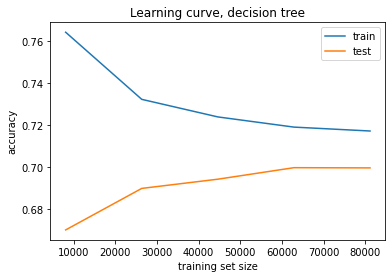

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10,scoring='accuracy') 
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train') 
plt.plot(train_sizes, test_scores_mean, label='test') 
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.title('Learning curve, decision tree')
plt.legend();

Our learning curve tells us that our model is facing high variance. High variance is a type of error that occurs due to a model's sensitivity to small fluctuations in the training set. We will fix this issue

To find out which hyperparameters work the best with our decision tree classifier, we will use GridSearch.


In [ ]:
from sklearn.model_selection import GridSearchCV

Here we provide the max depth from range 2 to 8 and max features as auto none and min_sample_leaf from range 10 to 50 with an interval of 10. We provide the scoring metric as accuracy and number of folds as 10.

In [ ]:
grid = [ {'max_depth': range(2,8), 'max_features': ['auto', None], 'min_samples_leaf': range(10, 50, 10)}]
tree_cv = GridSearchCV(DecisionTreeClassifier(), grid, cv=10, scoring='accuracy') 
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': range(2, 8),
                          'max_features': ['auto', None],
                          'min_samples_leaf': range(10, 50, 10)}],
             scoring='accuracy')

We print the best parameters our GridSearch provides us.

In [ ]:
print(tree_cv.best_params_)

{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 10}


We see that using the best parameters that our GridSearch gave us, we get an accuracy of 70.1% which higher than the previous test accuracy.

In [ ]:
print('Best Accuracy: {:.3f}'.format(tree_cv.best_score_))

Best Accuracy: 0.701


We will now plot the learning curve to know if we are facing a high bias or high variance situation. A learning curve is a plot of model learning performance over experience or time.

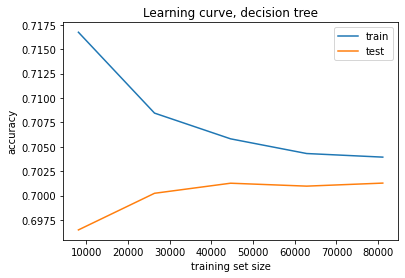

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(tree_cv.best_estimator_, X_train, y_train, cv=10,scoring='accuracy') 
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train') 
plt.plot(train_sizes, test_scores_mean, label='test') 
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.title('Learning curve, decision tree')
plt.legend();

This above learning curve is much better than the previous learning curve in terms of fitting.

We can see that the variation seems balanced and there is almost negligible overfitting in our model

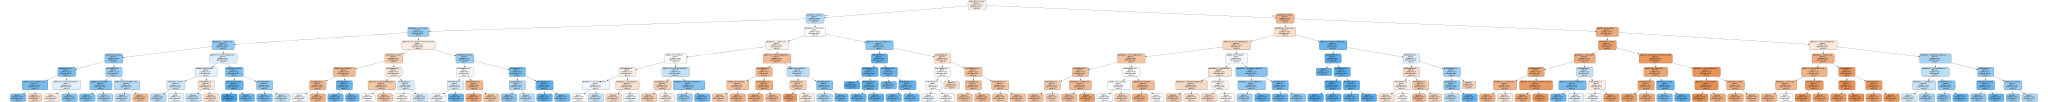

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
def plot_tree_custom(clf):
    """ Plot a Titanic classification tree. """
    
    target_names = ['0','1']
    dot_data = export_graphviz(clf, precision=2,
                         feature_names=predictors,  
                         proportion=True,
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

    # plot it
    graph = graphviz.Source(dot_data)  
    return graph
plot_tree_custom(tree_cv.best_estimator_)

We can see a tree of possible outcomes of related choices. It starts with 'Incident Year' with 100% samples.

We will now see important features. Generally, a feature is important in a tree if it is responsible for a lot of Gini reduction

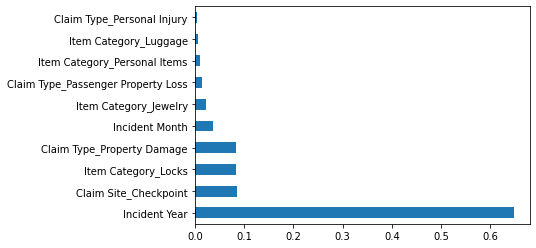

In [ ]:
pd.Series(tree_cv.best_estimator_.feature_importances_, index=predictors).sort_values(ascending=False)[:10].plot.barh();

We see that Incident Year, Claim Site_Checkpoint, Item Category_Locks, Claim Type_Property Damage, Incident month are important features is a decreasing order.
It is strange to know that Miscellaneous Items had the highest number of claims/count, yet it is not considered as an important feature of the tree.

We will not see which are the best features for our model using the forward feature selection

In [ ]:
def forward_selection_classif(clf, X, y, threshold=None, num_folds=5):
    remaining = list(range(X.shape[1]))
    selected = []
    accuracies = []
    previous_best = 0.0
    while len(remaining) > 0:
        best_i, best_accuracy = 0, 0.0
        for i in remaining:
            accuracy = cross_val_score(clf, X[:,selected+[i]], y, cv=num_folds).mean()
            if accuracy > best_accuracy:
                best_i, best_accuracy = i, accuracy
                
        if (threshold is not None) and (best_accuracy - previous_best) < threshold:
            break
        selected.append(best_i)
        accuracies.append(best_accuracy)
        remaining.remove(best_i)
        previous_best = best_accuracy
    
    
    return np.array(selected), accuracies

In [ ]:
def plot_selected(selected, accuracies, predictors):
    pd.Series(accuracies, index=predictors[selected]).plot.barh()
    plt.xlim(0.5, 1.0)
    plt.xlabel('Cross-validation accuracy')
    plt.title('Result of forward feature selection')

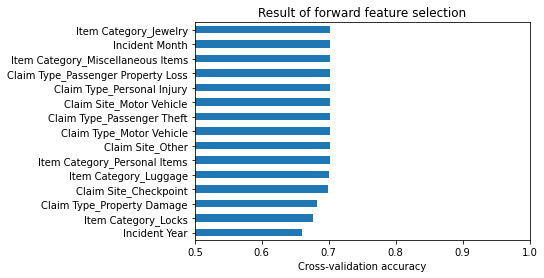

In [ ]:
selected, accuracies = forward_selection_classif(tree_cv.best_estimator_, X_train, y_train, num_folds=10)
plot_selected(selected[:15], accuracies[:15], np.array(predictors))

We print the top 15 accuracies of the predictors that did well on the model and round the decimal to 4 significant digits 

In [ ]:
print(np.array(accuracies[:15]).round(4))

[0.6601 0.6763 0.6825 0.6988 0.7005 0.7015 0.7022 0.7022 0.7022 0.7022
 0.7022 0.7021 0.702  0.7023 0.7013]


We will find the best score as assign to the variable 'accuracy'

In [ ]:
accuracy = tree_cv.best_estimator_.score(X_test, y_test) 
print('test accuracy: {:.3f}'.format(accuracy))

test accuracy: 0.707


Our test accuracy comes out to be 70.7%

Our Decision Tree Classifier was easy to read,iterpret and built to predict whether passengers receive any money or not when they file claims against TSA for property loss or damage.

The model yeilds a fairly decent performance and gives us the accuracy of 70.7%. There is improvement in the model after using GridSearch which helped us to minimize overfitting.

# Conclusion 

We developed both Categorical Naive Bayes and Decision Trees Classifier to predict whether passengers receive any money or not when they file claims against TSA for property loss or damage. 

When compared to the baseline accuracy, both our model performed well. Test accuracies of Categorical Naive Bayes and Decision Trees Classifier came out to be 68% and 70% respectively. While Decision Trees Classifier wins by slightly 2%. Moreover, tuning the hyperparameters made our model perform better and more efficiently.


